In [1]:
from torch.utils.data import DataLoader
from customDataset import CustomDataset
def create_dataloader(image_folder, annotation_folder, batch_size=32, image_size=416):
    dataset = CustomDataset(image_folder, annotation_folder, image_size=image_size)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    return dataloader

# Exemple d'utilisation :
image_folder = r"..\..\data\images\cars\images-files"
annotation_folder = image_folder
batch_size = 2
image_size = 416
dataloader = create_dataloader(image_folder, annotation_folder, batch_size, image_size)

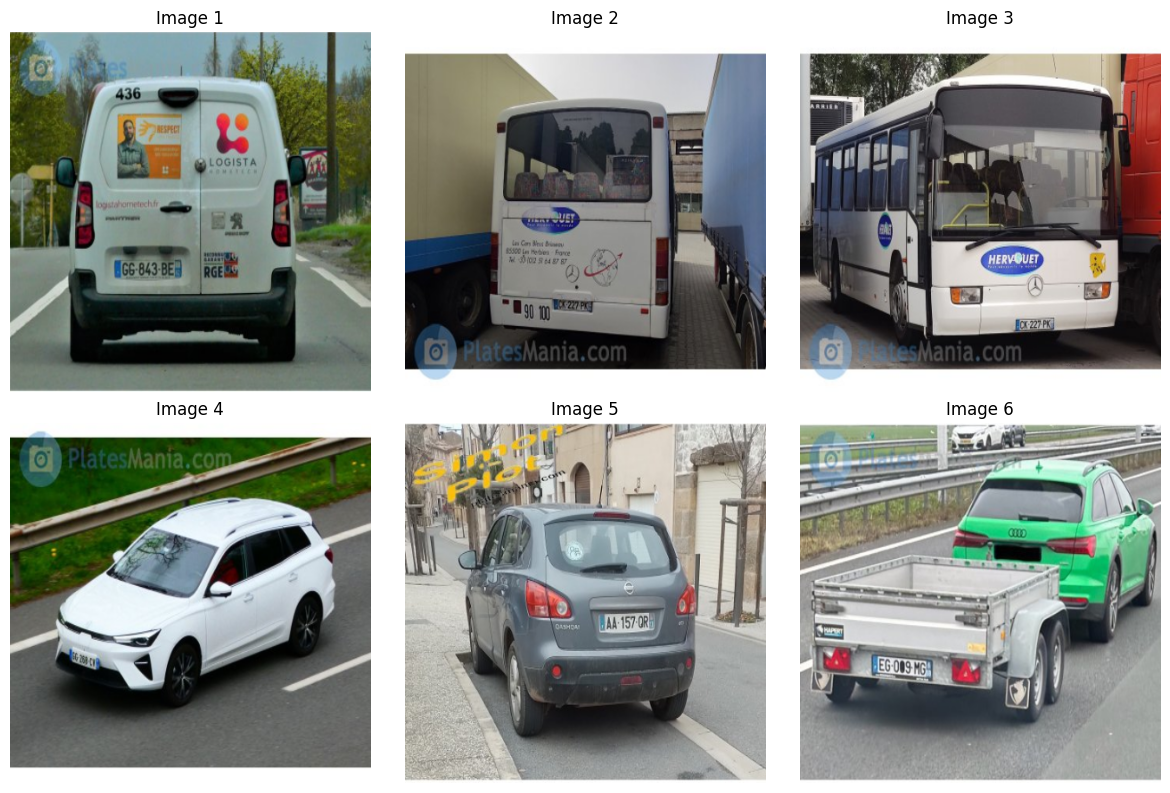

In [2]:
import matplotlib.pyplot as plt
import torchvision.transforms.functional as TF

# Parcourir le DataLoader pour obtenir les 6 premiers éléments
num_images = 6
images_to_display = []
annotations_to_display = []
for images, annotations in dataloader:
    for image, annotation in zip(images, annotations):
        images_to_display.append(image)
        annotations_to_display.append(annotation)
        if len(images_to_display) >= num_images:
            break
    if len(images_to_display) >= num_images:
        break

# Affichage des images
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
for i, ax in enumerate(axes.flat):
    image = TF.to_pil_image(images_to_display[i])
    ax.imshow(image)
    ax.axis('off')
    ax.set_title(f'Image {i+1}')

plt.tight_layout()
plt.show()